# Assignment 3
### Due 9/23. Do four of five.

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [30]:
import urllib.request
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""
    import urllib.request
    import zipfile
    import os
    
    zip_path = 'data.zip'
    data_dir = 'data'
    
    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/16954427/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")
    
    if not os.path.exists(data_dir):
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")
    
    return data_dir

download_data()

'data'

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
nhanes = pd.read_csv('data/nhanes_data_17_18.csv')
nhanes.head()

/var/folders/56/z80x17wn70lfrg6fj3lvncdr0000gn/T/ipykernel_3400/2125198248.py:1: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  nhanes = pd.read_csv('data/nhanes_data_17_18.csv')


,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
nhanesmeta = pd.read_csv('data/nhanes_meta_17_18.csv')
nhanesmeta

,VariableNameLong,Variable,Type,Format,Informat,Label,Source,VariableName,SASLabel,EnglishText,Target,VariableNameLong_variable_df,Source_variable_df,EnglishInstructions,HardEdits,Recoded,CustomRecoding,nNonNA
0,GeneralHealthCondition,HSD010,Numeric,NaN,NaN,General health condition,HSQ,HSD010,General health condition,Next I have some general questions about {your...,Both males and females 12 YEARS -\n\n\t\t\t15...,GeneralHealthCondition,HSQ,NaN,NaN,True,NaN,5964.0
1,EverBreastfedOrFedBreastmilk,DBQ010,Numeric,NaN,NaN,Ever breastfed or fed breastmilk,DBQ,DBQ010,Ever breastfed or fed breastmilk,Now I'm going to ask you some general question...,Both males and females 0 YEARS -\n\n\t\t\t6 Y...,EverBreastfedOrFedBreastmilk,DBQ,NaN,NaN,True,YesNo,1069.0
2,AgeStoppedBreastfeedingdays,DBD030,Numeric,NaN,NaN,Age stopped breastfeeding(days),DBQ,DBD030,Age stopped breastfeeding(days),How old was {SP} when {he/she} completely stop...,Both males and females 0 YEARS -\n\n\t\t\t6 Y...,AgeStoppedBreastfeedingdays,DBQ,NaN,NaN,False,NaN,862.0
3,AgeFirstFedFormuladays,DBD041,Numeric,NaN,NaN,Age first fed formula(days),DBQ,DBD041,Age first fed formula(days),How old was {SP} when {he/she} was first fed f...,Both males and females 0 YEARS -\n\n\t\t\t6 Y...,AgeFirstFedFormuladays,DBQ,NaN,NaN,False,NaN,1077.0
4,AgeStoppedReceivingFormuladays,DBD050,Numeric,NaN,NaN,Age stopped receiving formula(days),DBQ,DBD050,Age stopped receiving formula(days),How old was {SP} when {he/she} completely stop...,Both males and females 0 YEARS -\n\n\t\t\t6 Y...,AgeStoppedReceivingFormuladays,DBQ,NaN,NaN,False,NaN,891.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,UnitOfMeasureDayweekmonthyear_2_SMQ,SMQ852U,Numeric,NaN,NaN,Unit of measure (day/week/month/year),SMQ,SMQ852U,Unit of measure (day/week/month/year),"The last time {you/SP} tried to quit, how long...",Both males and females 18 YEARS -\n\n\t\t\t15...,UnitOfMeasureDayweekmonthyear,SMQ,ENTER UNIT,NaN,True,NaN,496.0
193,CurrentSelfreportedHeightInches,WHD010,Numeric,NaN,NaN,Current self-reported height (inches),WHQ,WHD010,Current self-reported height (inches),These next questions ask about {your/SP's} hei...,Both males and females 16 YEARS -\n\n\t\t\t15...,CurrentSelfreportedHeightInches,WHQ,ENTER HEIGHT IN FEET AND INCHES OR METERS AND ...,NaN,False,NaN,5776.0
194,CurrentSelfreportedWeightPounds,WHD020,Numeric,NaN,NaN,Current self-reported weight (pounds),WHQ,WHD020,Current self-reported weight (pounds),How much {do you/does SP} weigh without clothe...,Both males and females 16 YEARS -\n\n\t\t\t15...,CurrentSelfreportedWeightPounds,WHQ,"RECORD CURRENT WEIGHT. IF PREGNANT, ASK FOR WE...",NaN,False,NaN,5828.0
195,TriedToLoseWeightInPastYear,WHQ070,Numeric,NaN,NaN,Tried to lose weight in past year,WHQ,WHQ070,Tried to lose weight in past year,"During the past 12 months, {have you/has SP} t...",Both males and females 16 YEARS -\n\n\t\t\t15...,TriedToLoseWeightInPastYear,WHQ,NaN,NaN,True,YesNo,5087.0


In [34]:
categorical_vars = nhanesmeta[nhanesmeta['Type'] == 'Character']
categorical_vars.head()

,VariableNameLong,Variable,Type,Format,Informat,Label,Source,VariableName,SASLabel,EnglishText,Target,VariableNameLong_variable_df,Source_variable_df,EnglishInstructions,HardEdits,Recoded,CustomRecoding,nNonNA
57,UsualSleepTimeOnWeekdaysOrWorkdays,SLQ300,Character,NaN,NaN,Usual sleep time on weekdays or workdays,SLQ,SLQ300,Usual sleep time on weekdays or workdays,What time {do you/does SP} usually fall asleep...,Both males and females 16 YEARS -\t\t\t150 YEARS,UsualSleepTimeOnWeekdaysOrWorkdays,SLQ,Character variable 'HH:MM' ('00:00' to '23:30'),NaN,False,NaN,5828.0
58,UsualWakeTimeOnWeekdaysOrWorkdays,SLQ310,Character,NaN,NaN,Usual wake time on weekdays or workdays,SLQ,SLQ310,Usual wake time on weekdays or workdays,What time {do you/does SP} usually wake up on ...,Both males and females 16 YEARS -\t\t\t150 YEARS,UsualWakeTimeOnWeekdaysOrWorkdays,SLQ,Character variable 'HH:MM' ('00:00' to '23:30'),NaN,False,NaN,5828.0


In [40]:
nhanes[['UsualSleepTimeOnWeekdaysOrWorkdays', 'UsualWakeTimeOnWeekdaysOrWorkdays']].isna().sum()


UsualSleepTimeOnWeekdaysOrWorkdays    2538
UsualWakeTimeOnWeekdaysOrWorkdays     2538
dtype: int64

In [41]:
pd.crosstab(nhanes['UsualSleepTimeOnWeekdaysOrWorkdays'], nhanes['UsualWakeTimeOnWeekdaysOrWorkdays'])


UsualWakeTimeOnWeekdaysOrWorkdays,b'',b'00:00',b'01:00',b'01:30',b'02:00',b'02:30',b'02:40',b'02:50',b'03:00',b'03:05',...,b'21:00',b'21:30',b'21:45',b'21:50',b'22:00',b'22:30',b'23:00',b'23:30',b'77777',b'99999'
UsualSleepTimeOnWeekdaysOrWorkdays,,,,,,,,,,,,,,,,,,,,,
b'',33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b'00:00',0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,1
b'00:30',0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b'01:00',0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b'01:30',0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b'02:00',0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b'02:30',0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b'03:00',0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
b'03:30',0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


When examining the contingency table of usual sleep time versus usual wake time on weekdays, most of the cells are empty because each specific time (e.g., 22:00, 22:30, 23:00) is treated as its own category. Even so, there are some clear clusters: the non-zero counts mostly fall around late evening sleep times (roughly 10 PM–midnight) combined with early morning wake times (around 6–8 AM). This pattern reflects typical work and school schedules. There are also many blank or missing responses, which highlights how messy survey data can be in practice. Very few people reported extreme schedules such as going to bed after 2 AM or waking after 10 AM. Overall, the table suggests that most respondents follow fairly conventional weekday routines, with the main limitation being the large number of missing values.

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [51]:
nhanes.columns

Index(['SEQN', 'GeneralHealthCondition', 'EverBreastfedOrFedBreastmilk',
       'AgeStoppedBreastfeedingdays', 'AgeFirstFedFormuladays',
       'AgeStoppedReceivingFormuladays', 'AgeStartedOtherFoodbeverage',
       'AgeFirstFedMilkdays', 'TypeOfMilkFirstFedWholeMilk',
       'TypeOfMilkFirstFed2Milk',
       ...
       'DaysSmokedCigsDuringPast30Days', 'AvgCigarettesdayDuringPast30Days',
       'TriedToQuitSmoking', 'TimesStoppedSmokingCigarettes',
       'HowLongWereYouAbleToStopSmoking',
       'UnitOfMeasureDayweekmonthyear_2_SMQ',
       'CurrentSelfreportedHeightInches', 'CurrentSelfreportedWeightPounds',
       'TriedToLoseWeightInPastYear', 'TimesLost10LbsOrMoreToLoseWeight'],
      dtype='object', length=198)

In [52]:
nhanes[['GeneralHealthCondition', 'DaysSmokedCigsDuringPast30Days']].isna().sum()


GeneralHealthCondition            2402
DaysSmokedCigsDuringPast30Days    7352
dtype: int64

In [54]:
nhanes['DaysSmokedCigsDuringPast30Days'] = nhanes['DaysSmokedCigsDuringPast30Days'].round().astype('Int64')

pd.crosstab(
    nhanes['GeneralHealthCondition'],
    nhanes['DaysSmokedCigsDuringPast30Days']
)



DaysSmokedCigsDuringPast30Days,0,1,2,3,4,5,6,7,8,9,...,20,22,24,25,26,27,28,29,30,99
GeneralHealthCondition,,,,,,,,,,,,,,,,,,,,,
Excellent,6,0,1,1,0,2,0,0,0,0,...,2,1,0,2,0,0,2,0,34,0
Fair or,3,1,4,5,1,4,1,1,0,0,...,11,1,0,3,1,0,2,1,221,0
Good,16,5,3,5,4,8,1,3,5,3,...,15,0,1,6,0,1,1,1,291,2
Poor?,0,0,0,1,1,0,0,1,0,0,...,3,0,0,1,0,0,2,0,32,1
Very good,12,5,4,3,3,3,1,0,0,0,...,13,1,0,5,0,2,1,2,96,0


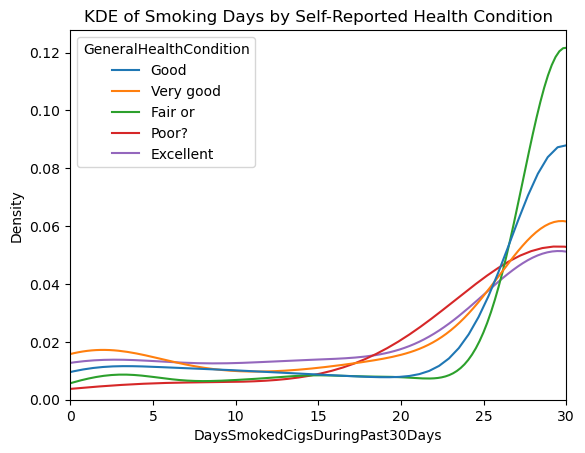

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(
    data=nhanes.dropna(subset=['DaysSmokedCigsDuringPast30Days']),
    x='DaysSmokedCigsDuringPast30Days',
    hue='GeneralHealthCondition',
    common_norm=False
).set(title='KDE of Smoking Days by Self-Reported Health Condition')

plt.xlim(0, 30)  # since it's days in the past 30 days
plt.show()


The KDE plot shows clear differences in smoking behavior across self-reported health categories. Respondents in excellent or very good health have low densities at high smoking days, with curves concentrated around zero, indicating most of them did not smoke in the past 30 days. In contrast, respondents in fair or poor health show flatter, wider distributions and higher densities at 20–30 days, suggesting heavier and more frequent smoking. Those reporting good health fall in between. Overall, the plot suggests a negative relationship between health status and smoking frequency.

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [72]:
import numpy as np
import pandas as pd

def silverman_bandwidth(x):
    x = np.asarray(x, dtype=float)
    x = x[~np.isnan(x)]
    n  = len(x)
    sd = np.std(x, ddof=1)
    iqr = np.subtract(*np.percentile(x, [75, 25]))
    sigma = min(sd, iqr/1.34) if np.isfinite(iqr) else sd
    h = 0.9 * sigma * n**(-1/5)
    return h if (np.isfinite(h) and h > 0) else sd * n**(-1/5) + 1e-6

def nw_predict(x, y, z, h=None):
    
    x = pd.Series(x, dtype=float)
    y = pd.Series(y, dtype=float)
    keep = (~x.isna()) & (~y.isna())
    x, y = x[keep].to_numpy(), y[keep].to_numpy()

    z = np.asarray(z, dtype=float)
    if h is None:
        h = silverman_bandwidth(x)

    U = (z[:, None] - x[None, :]) / h
    K = np.exp(-0.5 * U**2) / (np.sqrt(2*np.pi) * h)
    num = (K * y[None, :]).sum(axis=1)
    den = K.sum(axis=1)
    return num / den



In [73]:
X = 'CurrentSelfreportedHeightInches'
Y = 'CurrentSelfreportedWeightPounds'

# keep plausible ranges only
df = nhanes[[X, Y]].dropna()
df = df[df[X].between(55, 80) & df[Y].between(70, 400)]  

x, y = df[X], df[Y]
z = np.array([60, 65, 70, 75])
yhat = nw_predict(x, y, z)
list(zip(z, yhat.round(1)))


[(np.int64(60), np.float64(150.4)),
 (np.int64(65), np.float64(172.2)),
 (np.int64(70), np.float64(197.2)),
 (np.int64(75), np.float64(232.1))]

Using the Nadaraya–Watson estimator with a Gaussian kernel and Silverman’s bandwidth on height, I estimated mean weight at several heights. The conditional mean increases steadily from ~150 lb at 60″ to ~232 lb at 75″, showing a clear positive relationship between height and weight. The increments also grow slightly at taller heights, suggesting a modest convexity (heavier weights become more common among taller individuals). Overall, the NW smoother captures the expected monotone trend without assuming a linear form.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

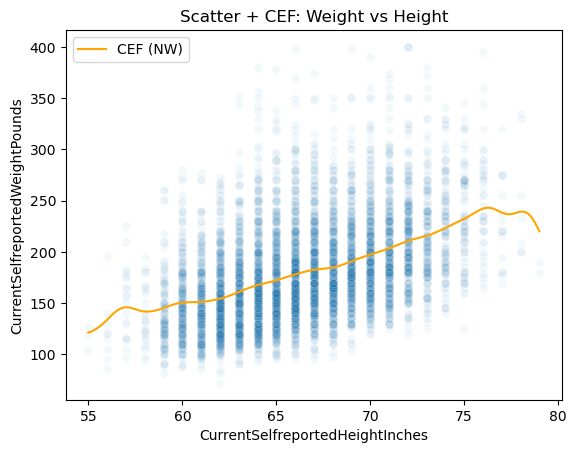

In [74]:
X = 'CurrentSelfreportedHeightInches'
Y = 'CurrentSelfreportedWeightPounds'

# keep plausible ranges; tweak if needed
df = nhanes[[X, Y]].dropna()
df = df[df[X].between(55, 80) & df[Y].between(70, 400)]

# grid + CEF
grid = np.linspace(df[X].min(), df[X].max(), 200)
y_hat = nw_predict(df[X], df[Y], grid)

# --- Plot in your prof's style ---
sns.scatterplot(data=df, y=Y, x=X, alpha=.05)
sns.lineplot(x=grid, y=y_hat, color='orange', label='CEF (NW)')
plt.title('Scatter + CEF: Weight vs Height')
plt.xlabel(X); plt.ylabel(Y)
plt.legend(); plt.show()

I examined the relationship between height and weight in NHANES using a scatterplot and the conditional expectation function (CEF) estimated with a Nadaraya–Watson (local constant) smoother, using a Gaussian kernel and Silverman’s bandwidth on height. The CEF rises steadily across the observed range: the estimated mean weight is ~150 lb at 60″, ~172 lb at 65″, ~197 lb at 70″, and ~232 lb at 75″, indicating a clear positive association between height and weight. A slight dip at the extreme right tail likely reflects boundary effects where very tall observations are sparse.

This association is not plausibly causal. Height is largely predetermined (genetics/early-life), while weight depends on many omitted factors—sex, age, body composition, physical activity, diet, and health conditions. Additional threats to causal identification include self-reported measurement error and possible sample selection. Thus, the observed correlation should not be interpreted as the causal effect of height on weight.

Nevertheless, the CEF is useful for prediction. Without intervening on height, the estimated provides accurate baseline predictions for individuals in similar populations. Prediction relies on stable associations, not causal identification, so the model remains valuable even in the presence of the above threats.